# importing all the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("Titanic.csv") #Loading/Importing the CSV file dataset

# Dataset OverView

In [3]:
df.head() #shows first 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Exploration

In [4]:
df.shape #it shows the number of rows and columns

(891, 12)

In [5]:
df.info() #gives the overview of column information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe() #describes the aggregates of the dataset 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaing Process

In [7]:
df.isnull().sum() #The number of null values in the each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.drop("Cabin",axis=1,inplace=True) #Dropping/Deleting the entire Cabin column bcz of lot of missing/null values

In [9]:
df.isnull().sum() #checking whether the Cabin column is dropped or not

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [10]:
df['Age'].skew() #Checking the skewness of the asymmetry data distribution & it shows that we have normal distribution of data

0.38910778230082704

In [11]:
df['Age']=df['Age'].fillna(df['Age'].mean) #Handling the missing values in the Age columns with mean

In [12]:
df.isna().sum() #Checking that the Age columns missing values are replaced or not

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0]) # Handling the missing values in the Embarked column with mode

In [14]:
df.isna().sum() #Checking whether we are still left with null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Handling Duplicates

In [15]:
df.duplicated().sum() #Sum of duplicate values

0

# Key Insights/Data Analysis Process

In [16]:
df["PassengerId"].count() #Number of Passangers present on the ship

891

In [17]:
df['Survived'].value_counts() #Count of Number of peoples Survived & not Survived

Survived
0    549
1    342
Name: count, dtype: int64

In [18]:
df.groupby("Sex")["Survived"].count() #Counting the number of Male & Female passangers on the ship that survived

Sex
female    314
male      577
Name: Survived, dtype: int64

In [19]:
a=pd.DataFrame(df.groupby('Sex')['Survived'].mean()*100) #assigning 'a' for future visualization
a 

,Survived
Sex,
female,74.203822
male,18.890815


In [20]:
b=pd.DataFrame(df.groupby('Pclass')['Survived'].mean()*100)#assigning 'b' for future visualization
b

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


In [21]:
df.groupby('Sex')['Survived'].mean()*100 #The percentage of Genders that inlcude both, the survived & non survived one's

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [22]:
df.groupby('Pclass')['Survived'].mean()* 100 #Finding which class of passengers survived most

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

# Binning

In [23]:
bins=[0,18,36,72] #we are grouping passangers based on there age
labels=["child","adult","old"]
df["Age"] = pd.to_numeric(df["Age"], errors='coerce') # The age column was not in numeric, so had to convert it first to numeric
df["Age_group"]=pd.cut(df["Age"],bins=bins,labels=labels) #New column Age_group is created here

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,old
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult


In [25]:
c=pd.DataFrame(df.groupby("Age_group")["Survived"].mean()*100) 
c #how many passangers survied based on their age category & assigning to 'c' for future visualization

C:\Users\manik\AppData\Local\Temp\ipykernel_10800\3431931367.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  c=pd.DataFrame(df.groupby("Age_group")["Survived"].mean()*100)


,Survived
Age_group,
child,50.359712
adult,38.947368
old,36.787565


In [26]:
df.sort_values(by="Fare",ascending=False) #Sorting the dataset by Fare column in desc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,adult
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,adult
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,adult
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S,adult
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S,adult
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,S,NaN
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,S,NaN
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,S,old
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,S,NaN


# From above sorting we understood that, the passangers who paid more had much survival rate

In [27]:
df['Family_member']=df['SibSp']+df['Parch']

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Family_member
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,old,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult,0


In [29]:
df['Family_member'].sum() #Around 90% of passangers were family members

806

In [30]:
df['Name'].str.contains('Mr.').sum() #70-80% of passangers were married

647

In [31]:
df.groupby("Age_group")["Survived"].mean()*100 # % of what category passangers survived

C:\Users\manik\AppData\Local\Temp\ipykernel_10800\2926354260.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_group")["Survived"].mean()*100 # % of what category passangers survived


Age_group
child    50.359712
adult    38.947368
old      36.787565
Name: Survived, dtype: float64

# Data Visualization Process

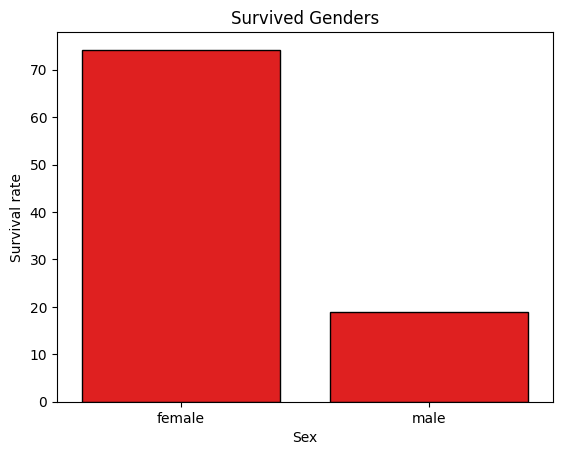

In [38]:
sns.barplot(x='Sex',y='Survived',data=a,color='red',edgecolor='black') #using 'a' dataframe which is assigned earlier
plt.title('Survived Genders')
plt.ylabel('Survival rate')
plt.show()

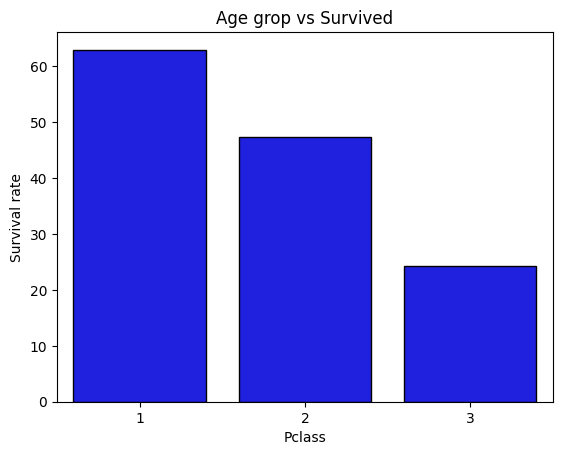

In [37]:
sns.barplot(x='Pclass',y='Survived',data=b,color='blue',edgecolor='black') #using 'b' dataframe which is assigned earlier
plt.title('Age grop vs Survived')
plt.ylabel('Survival rate')
plt.show()

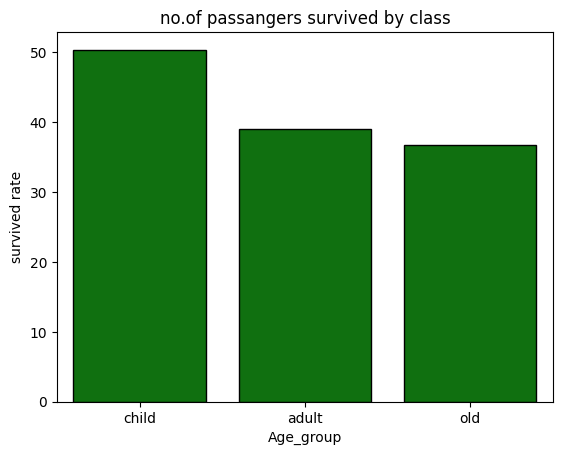

In [36]:
sns.barplot(x='Age_group',y='Survived',data=c,color='green',edgecolor='black') #using 'c' dataframe which is assigned earlier
plt.title('no.of passangers survived by class')
plt.ylabel('survived rate')
plt.show()

# Dashboard

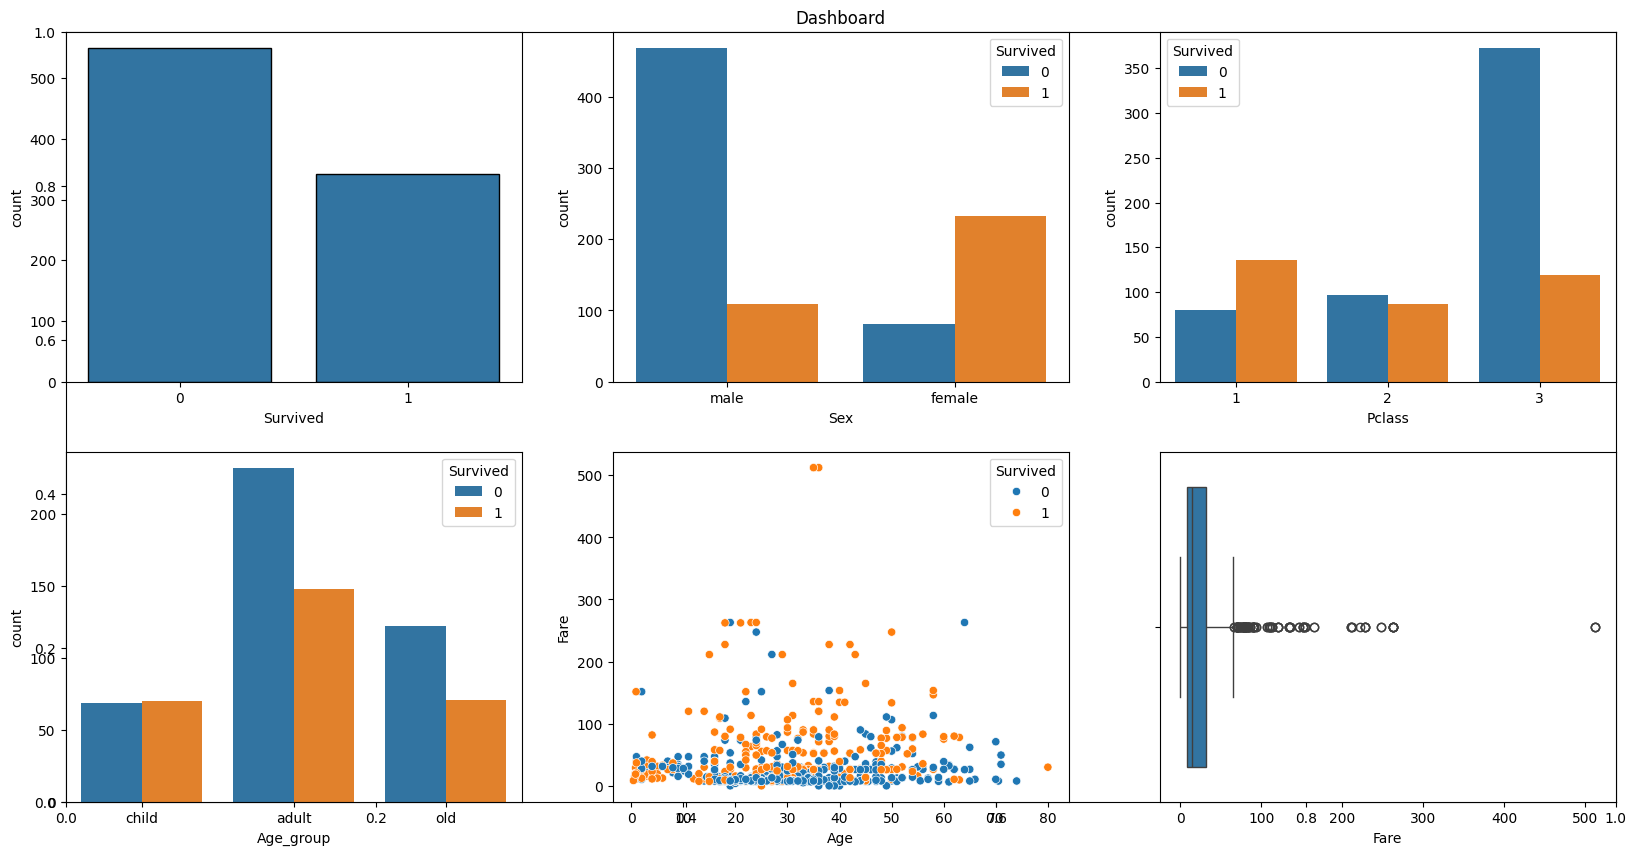

In [48]:
plt.figure(figsize=(20,10)) #Adjusting the chart sizes

plt.title('Dashboard')

plt.subplot(2,3,1) #Defining the row and column
sns.countplot(x='Survived',data=df,edgecolor='black')

plt.subplot(2,3,2)
sns.countplot(x='Sex',hue='Survived',data=df)

plt.subplot(2,3,3)
sns.countplot(x='Pclass',hue='Survived',data=df)

plt.subplot(2,3,4)
sns.countplot(x='Age_group',hue='Survived',data=df)

plt.subplot(2,3,5)
sns.scatterplot(x='Age',y='Fare',hue='Survived',data=df)

plt.subplot(2,3,6)
sns.boxplot(x='Fare',data=df)

plt.show()

# Data Story Telling 

### 1. Most of the people were dead in the incident.
### 2. Most of the Male passangers were dead in the incident.
### 3. Most of the passangers who survived were from class 1.
### 4. Children's survival rate was higher than that of adults and the elderly.
### 5. People who paid more had higher survival rates.
### 6. Around 20 passangers are paying more than the average people.